In [45]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings("ignore", category=FutureWarning) # Ignore FutureWarnings


data = arff.loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])

# Features
X = df.drop(columns='class').values

# Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 1

In [46]:

def purity_score(y_true, y_pred):
    confusion_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 


k_values = [2, 3, 4, 5]

silhouette_scores = {}
purity_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X_normalized)

    silhouette = metrics.silhouette_score(X_normalized, cluster_labels)
    silhouette_scores[k] = silhouette
    
    purity = purity_score(df['class'], cluster_labels)
    purity_scores[k] = purity

for k, silhouette in silhouette_scores.items():
    print(f"K = {k}, Silhouette Score: {silhouette}")
for k, purity in purity_scores.items():
    print(f"K = {k}, Purity Score: {purity}")

K = 2, Silhouette Score: 0.36044124340441114
K = 3, Silhouette Score: 0.29579055730002257
K = 4, Silhouette Score: 0.27442402122340176
K = 5, Silhouette Score: 0.23823928397844843
K = 2, Purity Score: 0.632258064516129
K = 3, Purity Score: 0.667741935483871
K = 4, Purity Score: 0.6612903225806451
K = 5, Purity Score: 0.6774193548387096


# 2

In [47]:
n_components = 2

pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_normalized)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance for Top Two Components:", explained_variance)

for i, component in enumerate(range(1, n_components + 1)):
    print(f"\nTop Variables for Principal Component {component} (sorted by relevance):")
    component_weights = pca.components_[i]
    sorted_indices = np.argsort(np.abs(component_weights))[::-1]
    
    for idx in sorted_indices:
        print(f"Variable: {df.columns[idx]}, Weight: {component_weights[idx]}")


Explained Variance for Top Two Components: [0.56181445 0.20955953]

Top Variables for Principal Component 1 (sorted by relevance):
Variable: pelvic_incidence, Weight: 0.5916206177372234
Variable: lumbar_lordosis_angle, Weight: 0.5150847620730926
Variable: pelvic_tilt, Weight: 0.46703943896727157
Variable: sacral_slope, Weight: 0.3256888625569196
Variable: degree_spondylolisthesis, Weight: 0.21692963450485403
Variable: pelvic_radius, Weight: -0.11582397626328887

Top Variables for Principal Component 2 (sorted by relevance):
Variable: pelvic_tilt, Weight: -0.6703727595553627
Variable: pelvic_radius, Weight: -0.5810738370953603
Variable: sacral_slope, Weight: 0.4433029949470745
Variable: pelvic_incidence, Weight: 0.10003707489152235
Variable: lumbar_lordosis_angle, Weight: 0.08004745059088263
Variable: degree_spondylolisthesis, Weight: 0.0045829097093999325


# 3

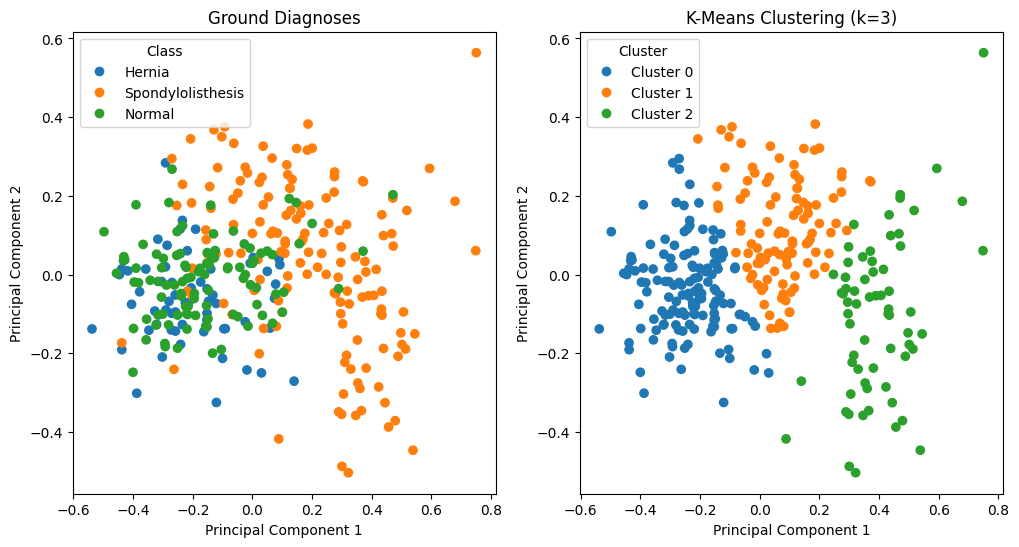

In [10]:
from matplotlib.colors import ListedColormap

kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(X_normalized)

# Mapping of class labels to numerical values
y = df['class']
y = y.astype(str)
class_mapping = {'Hernia': 0, 'Spondylolisthesis': 1, 'Normal': 2}
class_numerical = y.map(class_mapping)

# Define colormap and legend labels
cmap = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c'])
legend_labels = ['Hernia', 'Spondylolisthesis', 'Normal']


# Create a scatter plot for ground diagnoses
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=class_numerical, cmap=cmap)
plt.title("Ground Diagnoses")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(handles=scatter.legend_elements()[0], title="Class", labels=legend_labels)

# Create a scatter plot for k-means clustering
plt.subplot(1, 2, 2)
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap=cmap)
plt.title("K-Means Clustering (k=3)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(handles=scatter.legend_elements()[0], title="Cluster", labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])

plt.show()

# 4

The Silhouette Score measures the quality of the clustering results. Higher Silhouette Scores indicate better separation of clusters, in this case, a higher Silhouette Score for K=2 suggests that there may be a clear separation between two groups of individuals, which as we will se could correspond to "ill" and "healthy" populations.the HErnia and Normal Classes versus the Spondylolisthesis class.

The Purity Score assesses how accurately the clustering corresponds to the true labels. A higher Purity Score for K=3 suggests that the clustering does a good job of assigning individuals to one of three clusters, which corresponds to the different classes of dignostics provided.

In the Ground Diagnoses Plot data points are color-coded based on the ground diagnoses we can see how the different diagnostic categories are distributed in the two-dimensional space created by PCA. There is not a strong separation between the Normal and Hernia Classes, however the Spondylolisthesis class is noticably distanced from the other two classes. 
This suggests that while PCA is able to capture some structure in the data, there might be significant overlap between the "Normal" and "Hernia" classes, making it challenging to distinguish between them based on the considered features.The clear separation of the "Spondylolisthesis" class from the others indicates that this condition has distinct features or patterns that can be captured by PCA.

When it comes to the K-Means Clustering Plot: data points are color-coded based on the K-Means clustering results with k=3. We see that PCA is effectively capturing the structure of the data new classes assigned by the K-means clustering algorithm as we see a clear separation between classes.This suggests that K-Means has identified underlying structure in the data that might not be entirely related to the known diagnostic categories.